In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as snsx
%matplotlib inline
from numpy import nan

In [33]:
matches=pd.read_csv('t20_matches.csv') 

In [34]:
matches.shape

(6417, 26)

# Cleaning the Data

In [35]:
matches.drop(['series_id'],axis=1, inplace=True)

In [36]:
com_matches = matches.loc[(matches['winner'] != 'Match abandoned without a ball bowled') &
             (matches['winner'] != 'No result (abandoned with a toss)') &
             (matches['winner'] != 'No result') &
             (matches['winner'] != 'Match cancelled without a ball bowled')] 

In [37]:
com_matches.shape

(6057, 25)

In [287]:
dls_matches = matches.loc[(matches['D/L_method'] == 1)]

In [288]:
dls_matches.shape

(233, 25)

In [289]:
dls_matches.rename(columns={"target":"D/L_target"})

,match_id,match_details,result,scores,date,venue,round,home,away,winner,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,D/L_target
64,304959,Semi-Final:Titans v Eagles at Centurion- Apr 2...,Eagles won by 7 wickets (with 29 balls remaini...,Titans 47 (14.3/16 ov); Eagles 48/3 (11.1/16 ov),28/04/2004,Centurion,Semi-Final,Titans,Eagles,Eagles,...,10.0,14.3,16.0,Eagles,48.0,3.0,11.1,16.0,1.0,NaN
65,304960,Final:Eastern Cape v Eagles at East London- Ma...,Eagles won by 7 runs (D/L method),Eagles 131/6 (20/20 ov); Eastern Cape 108/9 (1...,01/05/2004,East London,Final,Eastern Cape,Eagles,Eagles,...,6.0,20.0,20.0,Eastern Cape,108.0,9.0,17.0,17.0,1.0,116.0
66,304788,North Group:Derbyshire v Yorkshire at Derby- J...,Yorkshire won by 1 wicket (with 0 balls remain...,Derbyshire 133/8 (20/20 ov); Yorkshire 108/9 (...,02/07/2004,Derby,North Group,Derbyshire,Yorkshire,Yorkshire,...,8.0,20.0,20.0,Yorkshire,108.0,9.0,15.0,15.0,1.0,108.0
67,304790,South Group:Kent v Middlesex at Maidstone- Jul...,Kent won by 7 wickets (with 29 balls remaining...,Middlesex 155/7 (18/18 ov); Kent 157/3 (13.1/1...,02/07/2004,Maidstone,South Group,Kent,Middlesex,Kent,...,7.0,18.0,18.0,Kent,157.0,3.0,13.1,18.0,1.0,157.0
71,304795,Midland/Wales/West Group:Warwickshire v Somers...,Warwickshire won by 7 wickets (with 39 balls r...,Somerset 120 (19.5/20 ov); Warwickshire 101/3 ...,02/07/2004,Birmingham,Midland/Wales/West Group,Warwickshire,Somerset,Warwickshire,...,10.0,19.5,20.0,Warwickshire,101.0,3.0,9.3,16.0,1.0,101.0
77,304799,Midland/Wales/West Group:Northamptonshire v Wo...,Worcestershire won by 21 runs (D/L method),Worcestershire 173/5 (20/20 ov); Northamptonsh...,05/07/2004,Luton,Midland/Wales/West Group,Northamptonshire,Worcestershire,Worcestershire,...,5.0,20.0,20.0,Northamptonshire,80.0,8.0,11.0,11.0,1.0,102.0
109,304832,Midland/Wales/West Group:Worcestershire v Glam...,Glamorgan won by 20 runs (D/L method),Glamorgan 140/6 (16/16 ov); Worcestershire 120...,15/07/2004,Worcester,Midland/Wales/West Group,Worcestershire,Glamorgan,Glamorgan,...,6.0,16.0,16.0,Worcestershire,120.0,10.0,14.1,16.0,1.0,NaN
146,304996,"Lions v Titans at Johannesburg- Apr 15, 2005",Lions won by 12 runs (D/L method),"Lions 76/1 (7/7 ov); Titans 65/1 (7/7 ov, targ...",15/04/2005,Johannesburg,NaN,Lions,Titans,Lions,...,1.0,7.0,7.0,Titans,65.0,1.0,7.0,7.0,1.0,78.0
155,304963,Group A:Karachi Dolphins v Lahore Lions at Lah...,Karachi Dolphins won by 16 runs (D/L method),Karachi Dolphins 228/7 (20/20 ov); Lahore Lion...,25/04/2005,Lahore,Group A,Karachi Dolphins,Lahore Lions,Karachi Dolphins,...,7.0,20.0,20.0,Lahore Lions,190.0,9.0,18.0,18.0,1.0,207.0
183,304859,North Group:Derbyshire v Leicestershire at Der...,Derbyshire won by 7 wickets (with 7 balls rema...,Leicestershire 137 (20/20 ov); Derbyshire 105/...,24/06/2005,Derby,North Group,Derbyshire,Leicestershire,Derbyshire,...,10.0,20.0,20.0,Derbyshire,105.0,3.0,12.5,14.0,1.0,103.0


In [90]:
dls_matches.shape

(233, 25)

# Basic Analysis

## Matches affected by DLS



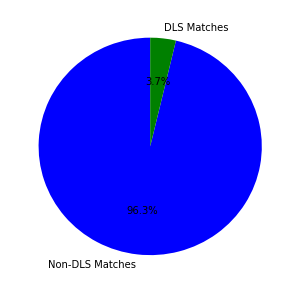

In [101]:
df = [len(com_matches), len(dls_matches)]
labels = ['Non-DLS Matches', 'DLS Matches']
colors = ['b','g']
plt.pie(df, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

## Is batting second an advantage in DLS?

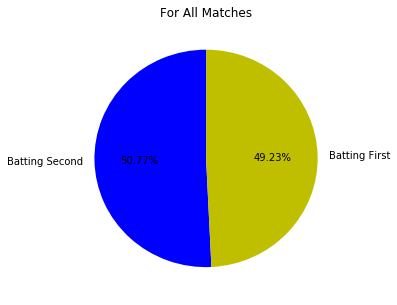

In [102]:
df = com_matches[com_matches['winner'] == com_matches['innings2']]
slices = [len(df), (com_matches.shape[0] - len(df))]
labels = ['Batting Second', 'Batting First']
colors = ['b','y']
plt.pie(slices, labels=labels, colors=colors, startangle=90, autopct='%.2f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('For All Matches')
plt.show()

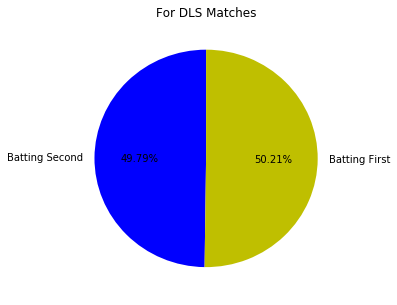

In [66]:
df = dls_matches[dls_matches['winner']==dls_matches['innings2']]
slices = [len(df), (dls_matches.shape[0] - len(df))]
labels = ['Batting Second', 'Batting First']
colors = ['b','y']
plt.pie(slices, labels=labels, colors=colors, startangle=90, autopct='%.2f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('For DLS Matches')
plt.show()

__Conclusion:__ Batting Second after DLS didn't affect much to win contribution

## DLS Method used across each year

In [237]:
com_matches['date'] = pd.to_datetime(com_matches['date'])

In [239]:
com_matches['year'] = com_matches['date'].dt.year
year = com_matches['date'].dt.year

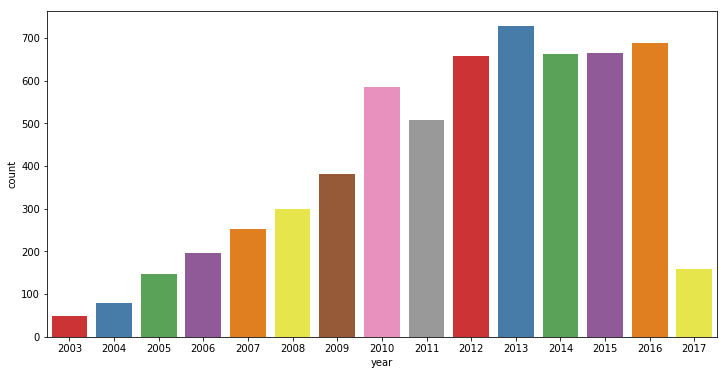

In [240]:
plt.subplots(figsize=(12,6))
snsx.countplot(x='year',data=com_matches,palette='Set1')
plt.show()

In [128]:
dls_matches['date'] = pd.to_datetime(dls_matches['date'])

In [130]:
dls_matches['year'] = dls_matches['date'].dt.year
year = dls_matches['date'].dt.year


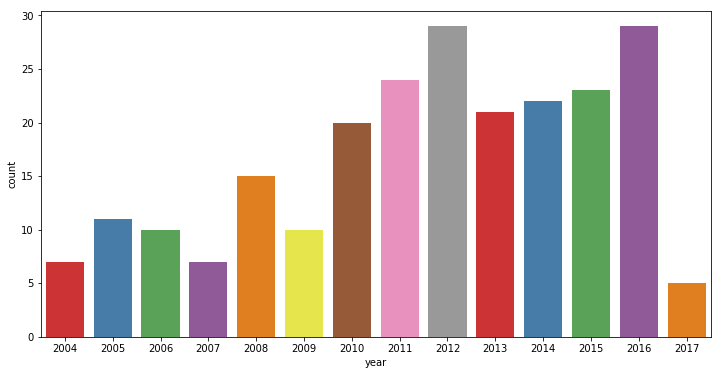

In [137]:
plt.subplots(figsize=(12,6))
snsx.countplot(x='year',data=dls_matches,palette='Set1')
plt.show()

## Venue with most D/L Affected Matches

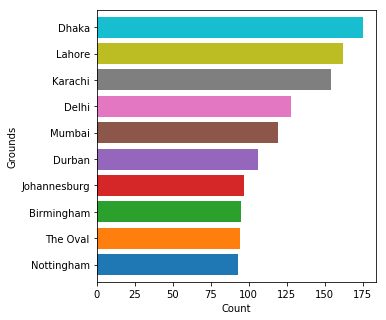

In [242]:
plt.subplots(figsize=(5,5))
ax = com_matches['venue'].value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.8)
ax.set_xlabel('Count')
ax.set_ylabel('Grounds')
plt.show()

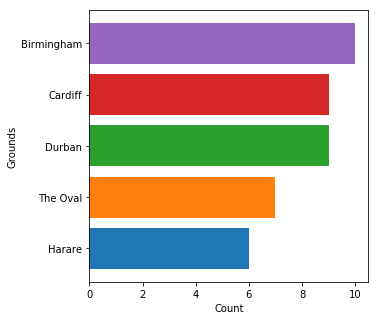

In [145]:
plt.subplots(figsize=(5,5))
ax = dls_matches['venue'].value_counts()[:5].sort_values(ascending=True).plot.barh(width=0.8)
ax.set_xlabel('Count')
ax.set_ylabel('Grounds')
plt.show()

__Conclusion :__ Most rain affected matches happen in England

## Was Target Revised after DLS?

In [229]:
a = len(dls_matches) - dls_matches['target'].count()

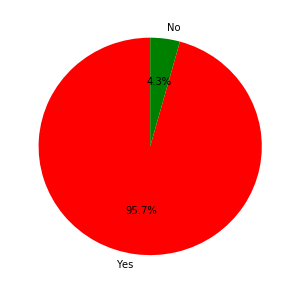

In [236]:
df = [(dls_matches['target'].count()), a]
labels = ['Yes', 'No']
colors = ['r','g']
plt.pie(df, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

__Conclusion__ : Only 10 cases where either overs were decided before or team got all out before quota of overs.

# Finding D/L Matches using certain cases 

In [383]:
# Case1 innings1 run > innings2 runs and innings2 team win
df = com_matches[com_matches.innings1_runs>com_matches.innings2_runs]
df = df[com_matches.winner==com_matches.innings2]
df1 = df[com_matches.target.notna()]
#len(df)
df1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,match_id,match_details,result,scores,date,venue,round,home,away,winner,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
66,304788,North Group:Derbyshire v Yorkshire at Derby- J...,Yorkshire won by 1 wicket (with 0 balls remain...,Derbyshire 133/8 (20/20 ov); Yorkshire 108/9 (...,2004-02-07,Derby,North Group,Derbyshire,Yorkshire,Yorkshire,...,8.0,20.0,20.0,Yorkshire,108.0,9.0,15.0,15.0,1.0,108.0
71,304795,Midland/Wales/West Group:Warwickshire v Somers...,Warwickshire won by 7 wickets (with 39 balls r...,Somerset 120 (19.5/20 ov); Warwickshire 101/3 ...,2004-02-07,Birmingham,Midland/Wales/West Group,Warwickshire,Somerset,Warwickshire,...,10.0,19.5,20.0,Warwickshire,101.0,3.0,9.3,16.0,1.0,101.0
183,304859,North Group:Derbyshire v Leicestershire at Der...,Derbyshire won by 7 wickets (with 7 balls rema...,Leicestershire 137 (20/20 ov); Derbyshire 105/...,2005-06-24,Derby,North Group,Derbyshire,Leicestershire,Derbyshire,...,10.0,20.0,20.0,Derbyshire,105.0,3.0,12.5,14.0,1.0,103.0
209,304885,"South Group:Sussex v Surrey at Hove- Jun 29, 2005",Surrey won by 5 wickets (with 0 balls remainin...,Sussex 139/6 (17/17 ov); Surrey 116/5 (13/13 o...,2005-06-29,Hove,South Group,Sussex,Surrey,Surrey,...,6.0,17.0,17.0,Surrey,116.0,5.0,13.0,13.0,1.0,114.0
303,224223,Final:Chilaw Marians Cricket Club v Sinhalese ...,Sinhalese Sports Club won by 7 runs (D/L method),Chilaw Marians Cricket Club 144/9 (20/20 ov); ...,2005-05-11,Moratuwa,Final,Chilaw Marians Cricket Club,Sinhalese Sports Club,Sinhalese Sports Club,...,9.0,20.0,20.0,Sinhalese Sports Club,53.0,1.0,6.5,6.5,1.0,47.0
331,265434,"Dolphins v Eagles at Durban- Feb 3, 2006",Eagles won by 7 wickets (with 5 balls remainin...,Dolphins 190/7 (20/20 ov); Eagles 148/3 (14.1/...,2006-03-02,Durban,NaN,Dolphins,Eagles,Eagles,...,7.0,20.0,20.0,Eagles,148.0,3.0,14.1,15.0,1.0,145.0
471,253521,12th Match:Grenada v St Vincent at Coolidge- J...,Grenada won by 12 runs (D/L method),St Vincent 122/7 (20/20 ov); Grenada 70/3 (10....,2006-07-26,Coolidge,12th Match,Grenada,St Vincent,Grenada,...,7.0,20.0,20.0,Grenada,70.0,3.0,10.1,10.1,1.0,59.0
483,269971,Auckland v Central Districts at Invercargill- ...,Central Districts won by 19 runs (D/L method),Auckland 140/7 (20/20 ov); Central Districts 9...,2006-11-11,Invercargill,NaN,Auckland,Central Districts,Central Districts,...,7.0,20.0,20.0,Central Districts,99.0,5.0,10.5,10.5,1.0,81.0
510,251487,1st T20I:New Zealand v Sri Lanka at Wellington...,Sri Lanka won by 18 runs (D/L method),New Zealand 162/8 (20/20 ov); Sri Lanka 62/1 (...,2006-12-22,Wellington,1st T20I,New Zealand,Sri Lanka,Sri Lanka,...,8.0,20.0,20.0,Sri Lanka,62.0,1.0,5.5,5.5,1.0,45.0
578,257283,"Lions v Eagles at Potchefstroom- Mar 4, 2007",Lions won by 6 runs (D/L method),Eagles 156/5 (20/20 ov); Lions 98/2 (12.3/12.3...,2007-04-03,Potchefstroom,NaN,Lions,Eagles,Lions,...,5.0,20.0,20.0,Lions,98.0,2.0,12.3,12.3,1.0,93.0


In [385]:
# Case2 inn1 runs - inn2 runs > margin of victory and innings1 team win
#matches.astype({'innings1_runs': 'int32'})
#matches.astype({'innings2_runs': 'int32'})
diff = com_matches.innings1_runs - com_matches.innings2_runs
df = com_matches[diff>com_matches.win_by_runs]
df2 = df[com_matches.winner==com_matches.innings1]
#len(df)
df2

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,match_id,match_details,result,scores,date,venue,round,home,away,winner,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
65,304960,Final:Eastern Cape v Eagles at East London- Ma...,Eagles won by 7 runs (D/L method),Eagles 131/6 (20/20 ov); Eastern Cape 108/9 (1...,2004-01-05,East London,Final,Eastern Cape,Eagles,Eagles,...,6.0,20.0,20.0,Eastern Cape,108.0,9.0,17.0,17.0,1.0,116.0
77,304799,Midland/Wales/West Group:Northamptonshire v Wo...,Worcestershire won by 21 runs (D/L method),Worcestershire 173/5 (20/20 ov); Northamptonsh...,2004-05-07,Luton,Midland/Wales/West Group,Northamptonshire,Worcestershire,Worcestershire,...,5.0,20.0,20.0,Northamptonshire,80.0,8.0,11.0,11.0,1.0,102.0
155,304963,Group A:Karachi Dolphins v Lahore Lions at Lah...,Karachi Dolphins won by 16 runs (D/L method),Karachi Dolphins 228/7 (20/20 ov); Lahore Lion...,2005-04-25,Lahore,Group A,Karachi Dolphins,Lahore Lions,Karachi Dolphins,...,7.0,20.0,20.0,Lahore Lions,190.0,9.0,18.0,18.0,1.0,207.0
203,304879,South Group:Surrey v Middlesex at The Oval- Ju...,Surrey won by 22 runs (D/L method),Surrey 180/7 (20/20 ov); Middlesex 78/4 (11/11...,2005-06-28,The Oval,South Group,Surrey,Middlesex,Surrey,...,7.0,20.0,20.0,Middlesex,78.0,4.0,11.0,11.0,1.0,101.0
226,304902,North Group:Derbyshire v Lancashire at Derby- ...,Lancashire won by 50 runs (D/L method),Lancashire 205/2 (20/20 ov); Derbyshire 106/7 ...,2005-04-07,Derby,North Group,Derbyshire,Lancashire,Lancashire,...,2.0,20.0,20.0,Derbyshire,106.0,7.0,14.3,14.3,1.0,157.0
282,265545,Group D:Burgher Recreation Club v Singha Sport...,Singha Sports Club won by 46 runs (D/L method),Singha Sports Club 157/2 (14/14 ov); Burgher R...,2005-10-22,Colombo (Colts),Group D,Burgher Recreation Club,Singha Sports Club,Singha Sports Club,...,2.0,14.0,14.0,Burgher Recreation Club,78.0,5.0,11.0,11.0,1.0,125.0
284,265543,Group B:Colts Cricket Club v Badureliya Sports...,Badureliya Sports Club won by 57 runs (D/L met...,Badureliya Sports Club 162/6 (20/20 ov); Colts...,2005-10-22,Colombo (Bloomfield),Group B,Colts Cricket Club,Badureliya Sports Club,Badureliya Sports Club,...,6.0,20.0,20.0,Colts Cricket Club,70.0,8.0,10.5,10.5,1.0,128.0
320,233620,"Dolphins v Titans at Durban- Jan 18, 2006",Titans won by 9 runs (D/L method),Titans 179/7 (20/20 ov); Dolphins 126/5 (15.1/...,2006-01-18,Durban,NaN,Dolphins,Titans,Titans,...,7.0,20.0,20.0,Dolphins,126.0,5.0,15.1,15.1,1.0,136.0
323,265428,"Eagles v Lions at Bloemfontein- Jan 22, 2006",Lions won by 28 runs (D/L method),Lions 174/4 (20/20 ov); Eagles 40/4 (7.4/7.4 o...,2006-01-22,Bloemfontein,NaN,Eagles,Lions,Lions,...,4.0,20.0,20.0,Eagles,40.0,4.0,7.4,7.4,1.0,69.0
358,264792,Pool A:Multan Tigers v Rawalpindi Rams at Kara...,Rawalpindi Rams won by 24 runs (D/L method),Rawalpindi Rams 165/6 (20/20 ov); Multan Tiger...,2006-02-26,Karachi,Pool A,Multan Tigers,Rawalpindi Rams,Rawalpindi Rams,...,6.0,20.0,20.0,Multan Tigers,75.0,5.0,10.0,10.0,1.0,100.0


In [387]:
#Case3 innings1_over<20 and innings2_over<20 
df = com_matches[com_matches.innings1_overs<20]
df = df[com_matches.innings2_overs<20]
df = df[com_matches.target>com_matches.innings1_runs+1]
df3 = df[com_matches.winner!='No result']
#len(df)
df3

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,match_id,match_details,result,scores,date,venue,round,home,away,winner,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
67,304790,South Group:Kent v Middlesex at Maidstone- Jul...,Kent won by 7 wickets (with 29 balls remaining...,Middlesex 155/7 (18/18 ov); Kent 157/3 (13.1/1...,2004-02-07,Maidstone,South Group,Kent,Middlesex,Kent,...,7.0,18.0,18.0,Kent,157.0,3.0,13.1,18.0,1.0,157.0
146,304996,"Lions v Titans at Johannesburg- Apr 15, 2005",Lions won by 12 runs (D/L method),"Lions 76/1 (7/7 ov); Titans 65/1 (7/7 ov, targ...",2005-04-15,Johannesburg,NaN,Lions,Titans,Lions,...,1.0,7.0,7.0,Titans,65.0,1.0,7.0,7.0,1.0,78.0
681,268401,South Division:Kent v Essex at Canterbury- Jun...,Kent won by 3 runs (D/L method),"Kent 44/1 (5.1/5.1 ov); Essex 46/6 (5/5 ov, ta...",2007-06-23,Canterbury,South Division,Kent,Essex,Kent,...,1.0,5.1,5.1,Essex,46.0,6.0,5.0,5.0,1.0,50.0
743,268465,Quarter-Final:Gloucestershire v Worcestershire...,Gloucestershire won by 7 wickets (with 17 ball...,Worcestershire 123/6 (17/17 ov); Gloucestershi...,2007-07-17,Bristol,Quarter-Final,Gloucestershire,Worcestershire,Gloucestershire,...,6.0,17.0,17.0,Gloucestershire,131.0,3.0,14.1,17.0,1.0,129.0
857,316549,"Eagles v Zimbabwe at Bloemfontein- Mar 26, 2008",Eagles won by 98 runs (D/L method),Eagles 181/3 (17/17 ov); Zimbabwe 85/9 (17/17 ...,2008-03-26,Bloemfontein,NaN,Eagles,Zimbabwe,Eagles,...,3.0,17.0,17.0,Zimbabwe,85.0,9.0,17.0,17.0,1.0,184.0
1010,320149,Midlands/West/Wales Division:Glamorgan v North...,Glamorgan won by 10 runs (D/L method),Glamorgan 154/6 (17/17 ov); Northamptonshire 1...,2008-06-20,Cardiff,Midlands/West/Wales Division,Glamorgan,Northamptonshire,Glamorgan,...,6.0,17.0,17.0,Northamptonshire,147.0,9.0,17.0,17.0,1.0,158.0
1033,320172,North Division:Derbyshire v Durham at Derby- J...,Durham won by 7 wickets (with 16 balls remaini...,Derbyshire 118/6 (18/18 ov); Durham 124/3 (15....,2008-06-25,Derby,North Division,Derbyshire,Durham,Durham,...,6.0,18.0,18.0,Durham,124.0,3.0,15.2,18.0,1.0,121.0
1061,354458,"6th Match:Ireland v Bermuda at Belfast- Aug 3,...",Ireland won by 4 runs (D/L method),"Ireland 43/7 (9/9 ov); Bermuda 41/8 (9/9 ov, t...",2008-03-08,Belfast,6th Match,Ireland,Bermuda,Ireland,...,7.0,9.0,9.0,Bermuda,41.0,8.0,9.0,9.0,1.0,46.0
1100,350347,Only T20I:South Africa v Bangladesh at Johanne...,South Africa won by 12 runs (D/L method),South Africa 118/7 (14/14 ov); Bangladesh 109/...,2008-05-11,Johannesburg,Only T20I,South Africa,Bangladesh,South Africa,...,7.0,14.0,14.0,Bangladesh,109.0,8.0,14.0,14.0,1.0,122.0
1139,359904,Semi-Final - 1st Leg:Eagles v Warriors at Bloe...,Eagles won by 9 wickets (with 11 balls remaini...,Warriors 100/6 (14/14 ov); Eagles 105/1 (12.1/...,2009-11-02,Bloemfontein,Semi-Final - 1st Leg,Eagles,Warriors,Eagles,...,6.0,14.0,14.0,Eagles,105.0,1.0,12.1,14.0,1.0,105.0


In [389]:
# Join all the above cases
df4 = pd.concat([df1,df2,df3])
len(df4)
df4

,match_id,match_details,result,scores,date,venue,round,home,away,winner,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
66,304788,North Group:Derbyshire v Yorkshire at Derby- J...,Yorkshire won by 1 wicket (with 0 balls remain...,Derbyshire 133/8 (20/20 ov); Yorkshire 108/9 (...,2004-02-07,Derby,North Group,Derbyshire,Yorkshire,Yorkshire,...,8.0,20.0,20.0,Yorkshire,108.0,9.0,15.0,15.0,1.0,108.0
71,304795,Midland/Wales/West Group:Warwickshire v Somers...,Warwickshire won by 7 wickets (with 39 balls r...,Somerset 120 (19.5/20 ov); Warwickshire 101/3 ...,2004-02-07,Birmingham,Midland/Wales/West Group,Warwickshire,Somerset,Warwickshire,...,10.0,19.5,20.0,Warwickshire,101.0,3.0,9.3,16.0,1.0,101.0
183,304859,North Group:Derbyshire v Leicestershire at Der...,Derbyshire won by 7 wickets (with 7 balls rema...,Leicestershire 137 (20/20 ov); Derbyshire 105/...,2005-06-24,Derby,North Group,Derbyshire,Leicestershire,Derbyshire,...,10.0,20.0,20.0,Derbyshire,105.0,3.0,12.5,14.0,1.0,103.0
209,304885,"South Group:Sussex v Surrey at Hove- Jun 29, 2005",Surrey won by 5 wickets (with 0 balls remainin...,Sussex 139/6 (17/17 ov); Surrey 116/5 (13/13 o...,2005-06-29,Hove,South Group,Sussex,Surrey,Surrey,...,6.0,17.0,17.0,Surrey,116.0,5.0,13.0,13.0,1.0,114.0
303,224223,Final:Chilaw Marians Cricket Club v Sinhalese ...,Sinhalese Sports Club won by 7 runs (D/L method),Chilaw Marians Cricket Club 144/9 (20/20 ov); ...,2005-05-11,Moratuwa,Final,Chilaw Marians Cricket Club,Sinhalese Sports Club,Sinhalese Sports Club,...,9.0,20.0,20.0,Sinhalese Sports Club,53.0,1.0,6.5,6.5,1.0,47.0
331,265434,"Dolphins v Eagles at Durban- Feb 3, 2006",Eagles won by 7 wickets (with 5 balls remainin...,Dolphins 190/7 (20/20 ov); Eagles 148/3 (14.1/...,2006-03-02,Durban,NaN,Dolphins,Eagles,Eagles,...,7.0,20.0,20.0,Eagles,148.0,3.0,14.1,15.0,1.0,145.0
471,253521,12th Match:Grenada v St Vincent at Coolidge- J...,Grenada won by 12 runs (D/L method),St Vincent 122/7 (20/20 ov); Grenada 70/3 (10....,2006-07-26,Coolidge,12th Match,Grenada,St Vincent,Grenada,...,7.0,20.0,20.0,Grenada,70.0,3.0,10.1,10.1,1.0,59.0
483,269971,Auckland v Central Districts at Invercargill- ...,Central Districts won by 19 runs (D/L method),Auckland 140/7 (20/20 ov); Central Districts 9...,2006-11-11,Invercargill,NaN,Auckland,Central Districts,Central Districts,...,7.0,20.0,20.0,Central Districts,99.0,5.0,10.5,10.5,1.0,81.0
510,251487,1st T20I:New Zealand v Sri Lanka at Wellington...,Sri Lanka won by 18 runs (D/L method),New Zealand 162/8 (20/20 ov); Sri Lanka 62/1 (...,2006-12-22,Wellington,1st T20I,New Zealand,Sri Lanka,Sri Lanka,...,8.0,20.0,20.0,Sri Lanka,62.0,1.0,5.5,5.5,1.0,45.0
578,257283,"Lions v Eagles at Potchefstroom- Mar 4, 2007",Lions won by 6 runs (D/L method),Eagles 156/5 (20/20 ov); Lions 98/2 (12.3/12.3...,2007-04-03,Potchefstroom,NaN,Lions,Eagles,Lions,...,5.0,20.0,20.0,Lions,98.0,2.0,12.3,12.3,1.0,93.0


In [390]:
df4.shape

(217, 25)

__Conclusion :__ Found out 217/223 D/L Matches from the dataset

# Training the Model

In [391]:
# Group all the matches by winner
import numpy as np
df5 = df4.groupby('winner')
print(df5.agg(np.size))

                                       match_id  match_details  result  \
winner                                                                   
Afghanistan                                   2              2       2   
Auckland                                      3              3       3   
Australia                                     1              1       1   
Badureliya Sports Club                        1              1       1   
Bangladesh                                    1              1       1   
Barbados                                      1              1       1   
Barbados Tridents                             2              2       2   
Barisal Bulls                                 1              1       1   
Bloomfield Cricket and Athletic Club          1              1       1   
Cape Cobras                                   2              2       2   
Central Districts                             4              4       4   
Chennai Super Kings                   

In [392]:
# An Example
print(df5.get_group("Auckland"))

      match_id                                      match_details  \
5465    917695  2nd Preliminary Final:Canterbury v Auckland at...   
2033    475392     Otago v Auckland at Invercargill- Dec 10, 2010   
3402    580782  Auckland v Central Districts at Auckland- Jan ...   

                                                 result  \
5465                Auckland won by 2 runs (D/L method)   
2033                Auckland won by 8 runs (D/L method)   
3402  Auckland won by 6 wickets (with 6 balls remain...   

                                                 scores       date  \
5465  Canterbury 113 (19.3/20 ov); Auckland 50/2 (9.... 2015-12-12   
2033  Auckland 175/8 (20/20 ov); Otago 116/3 (14.5/1... 2010-10-12   
3402  Central Districts 132/7 (18/18 ov); Auckland 1... 2013-01-15   

             venue                  round        home               away  \
5465  New Plymouth  2nd Preliminary Final  Canterbury           Auckland   
2033  Invercargill                    NaN       Otago

In [393]:
Df = pd.read_csv('t20_matches.csv')
Df = Df[Df['D/L_method']!=1]
Df1 =Df[Df['innings1']=='Chennai Super Kings']
Df2 =Df[Df['innings2']=='Chennai Super Kings']
Df = pd.concat([Df1,Df2])
C_data1 = Df1[['innings1_overs_batted','innings1_wickets','innings1_runs']]
C_data2 = Df2[['innings2_overs_batted','innings2_wickets','innings2_runs']]
C_data = C_data1.append(C_data2)
#C_data
XC1_data = C_data[['innings1_wickets','innings1_overs_batted']]
YC1_data = C_data[['innings1_runs']]
XC2_data = C_data[['innings2_wickets','innings2_overs_batted']]
YC2_data = C_data[['innings2_runs']]
XC1_data = XC1_data[XC1_data.innings1_wickets.notna()]
XC1_data = XC1_data[XC1_data.innings1_overs_batted.notna()]
YC1_data = YC1_data[YC1_data.innings1_runs.notna()]
XC2_data = XC2_data[XC2_data.innings2_wickets.notna()]
XC2_data = XC2_data[XC2_data.innings2_overs_batted.notna()]
YC2_data = YC2_data[YC2_data.innings2_runs.notna()]

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [394]:
# Fitting the model
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(XC1_data,YC1_data)
print(model.predict([[7,16]]))

[[98.01879256]]


In [126]:
#pd.options.mode.chained_assignment = None